In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

some questions : 

1 - what is relationship between score of **math** and **parent level of education**

2 - is the **gender** effect for scores math, reading and writing skills? 

3 - lunch impact on students score? 

4 - is test preparation course has positive effect on score of students?

5 - Which major factors **contributed** to test outcomes?

6 - What would be the best way to **improve** student scores on each test?


In [9]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
Data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Check for missing values for handling them

In [11]:
Data.duplicated().sum()

0

In [12]:
Data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**mean** and **std** can be used for data standrization (set mean to 0 and std to 1)


**min** and **max** can be used for data scalling (all values will be between 0 and 1)

In [13]:
Data.skew()

/tmp/ipykernel_34/136758805.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.skew()


math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

Skewness in data is small
so its apply **Normal Distribution**

In [38]:
groupedDataByEducationLevelOfParents = Data.groupby(["parental level of education"] , as_index=False).mean()


/tmp/ipykernel_34/1756240227.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedDataByEducationLevelOfParents = Data.groupby(["parental level of education"] , as_index=False).mean()


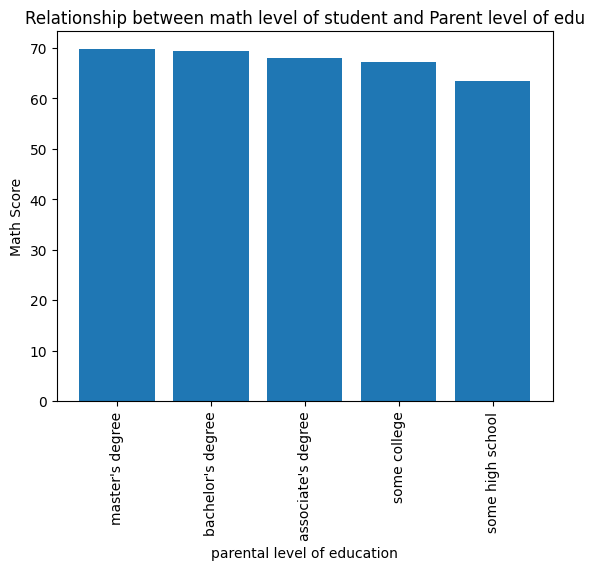

In [43]:
groupedDataByEducationLevelOfParents.sort_values(by="math score" , ascending=False , inplace=True)
Curr = groupedDataByEducationLevelOfParents.head();
plt.bar(Curr['parental level of education'], Curr['math score'])
plt.xlabel("parental level of education")
plt.ylabel("Math Score")
plt.title("Relationship between math level of student and Parent level of edu")
plt.xticks(rotation=90)
plt.show()

what is relationship between score of **math** and **parent level of education**

we can conclude that when parent level of education be more higher
probability of his children be have highest score is high

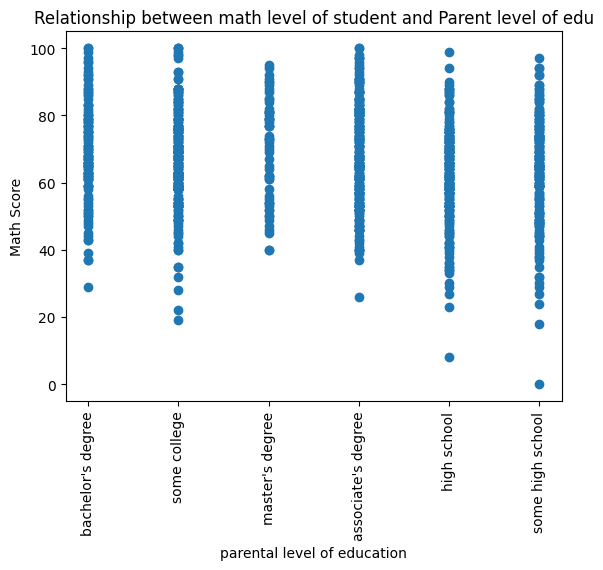

In [45]:
plt.scatter(Data['parental level of education'], Data['math score'])
plt.xlabel("parental level of education")
plt.ylabel("Math Score")
plt.title("Relationship between math level of student and Parent level of edu")
plt.xticks(rotation=90)

plt.show()

we can adopt from above figure that data contain some **out layer** values


specifically when parents has "some high level" degree

is the **gender** effect for scores math, reading and writing skills? 

/tmp/ipykernel_34/1195374627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataGroupedByGender = Data.groupby(["gender"]).mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


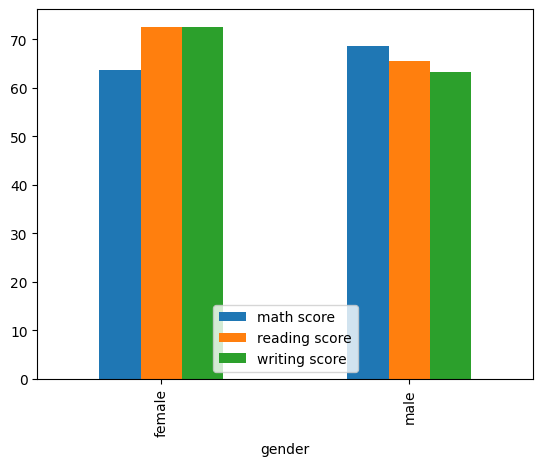

In [58]:
DataGroupedByGender = Data.groupby(["gender"]).mean()
DataGroupedByGender.plot(kind="bar")
DataGroupedByGender

from above : 

1 - males students has score on **math** greater than on females


2 - females students has score on **reading,writing** greater than on males

# 

/tmp/ipykernel_34/993316100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataGroupedByGender = Data.groupby(["lunch"]).mean()


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


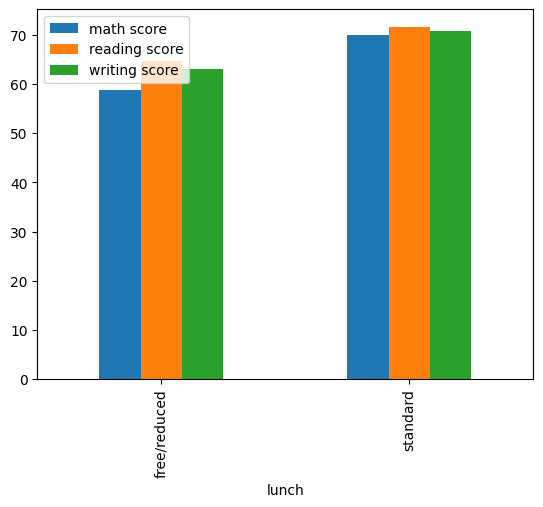

In [59]:
DataGroupedByGender = Data.groupby(["lunch"]).mean()
DataGroupedByGender.plot(kind="bar")
DataGroupedByGender

lunch impact on students score? 

in general **yes** when student eat standard lunch without any reduced will give him more power to his brain


/tmp/ipykernel_34/2097332198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataGroupedByGender = Data.groupby(["test preparation course"]).mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


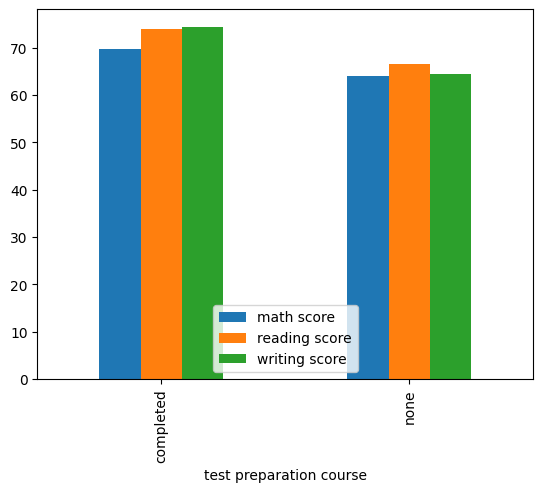

In [60]:
DataGroupedByGender = Data.groupby(["test preparation course"]).mean()
DataGroupedByGender.plot(kind="bar")
DataGroupedByGender

is test preparation course has positive effect on score of students?

**yes**
students whos go to test preparation course get more score

Which major factors contributed to test outcomes?

1 - test preparation

2 - lunch

3 - gender got more score than males on reading, writing exams

What would be the best way to **improve** student scores on each test?

1 - create more courses about test preparation

2 - standard lunch